In [20]:
import os
from os import listdir

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numba as nb
import numpy as np
import scipy as scp
import torchvision

from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from PIL import Image
from torch.utils.data.dataset import Dataset

In [21]:
@nb.njit('f8[:,::1](f8[:,::1], f8)')
def solve_heat_eqn(A0, t_fin: float = 1.):
    m, n = A0.shape
    Anext = np.copy(A0)
    A = np.copy(Anext)
    ht = 0.001
    hx = 0.001
    kc = 0.0001
    r = (ht * kc) / hx**2

    t = 0.
    while t < t_fin:
        for j in range(1, n-1):
            for i in range(1, m-1):
                Anext[i, j] = (A[i, j]
                               + r*(A[i, j+1]
                                    + A[i+1, j]
                                    + A[i, j-1]
                                    + A[i-1, j]
                                    - 4.*A[i, j]))
        A = np.copy(Anext)
        t += min(ht, t_fin-t)

    return A

In [23]:
class SkoltechPicsDataset(Dataset):
    """Skoltech pic dataset"""

    def __init__(self, root_dir: str, transform=None):
        """
        Args:
            root_dir: Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """

        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(os.listdir(self.root_dir))

    def __getitem__(self, idx):
        img_name = os.listdir(self.root_dir)[idx]
        img = np.array(Image.open(self.root_dir + '/' + img_name).convert('L')).astype(np.float64)

        if self.transform is not None:
            img = self.transform(img)

        return (img, solve_heat_eqn(img, 0.1))

In [25]:
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(p=0.5),
    torchvision.transforms.RandomVerticalFlip(p=0.5),
    torchvision.transforms.RandomPerspective(
        distortion_scale=0.15, p=0.5),
    torchvision.transforms.RandomRotation(15),
    torchvision.transforms.ElasticTransform(),
    torchvision.transforms.RandomInvert(p=0.5),
    torchvision.transforms.RandomErasing(p=0.5),
    torchvision.transforms.ToTensor()
])
test_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

In [ ]:
train = SkoltechPicsDataset('./pics', train_transform)
test = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

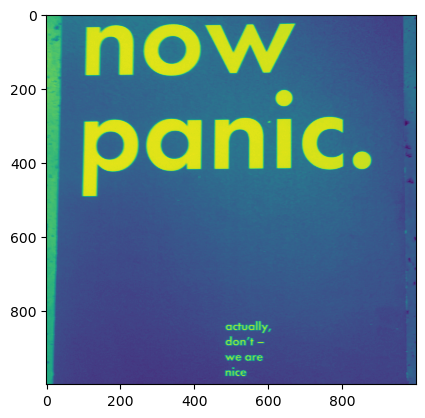

In [3]:
# img = mpimg.imread(
#     'pics/Skoltech now panic. actually don\'t - we are nice IMG_20230617_140732.jpg')
# imgplot = plt.imshow(img)
# z = 'pics/Skoltech now panic. actually don\'t - we are nice IMG_20230617_140732_resized.jpg'
img = np.array(Image.open(z).convert('L'))
imgplot = plt.imshow(img)
plt.show()

In [4]:
img.shape

(1000, 1000)

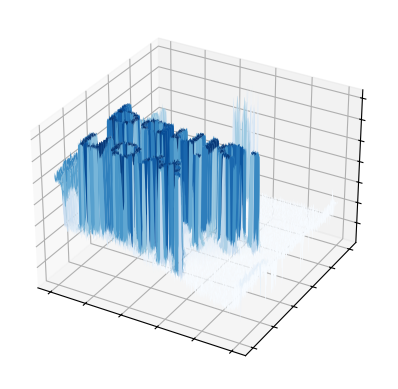

In [5]:
A0 = img
IMAGE_SIZE = 1000
x = np.linspace(0, 1, IMAGE_SIZE)
y = np.linspace(0, 1, IMAGE_SIZE)
X, Y = np.meshgrid(x, y)
# plt.pcolormesh(X, Y, A)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax.plot_wireframe(X, Y, A, rstride=10, cstride=10)
ax.plot_surface(X, Y, A0, vmin=A0.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

In [6]:
A0 = np.array(img).astype(np.float64)
A0

array([[180., 178., 177., ..., 116., 115., 116.],
       [182., 181., 178., ..., 116., 117., 118.],
       [184., 181., 178., ..., 117., 115., 113.],
       ...,
       [160., 161., 160., ..., 102., 100., 104.],
       [159., 162., 158., ..., 102., 102., 103.],
       [159., 160., 160., ..., 101., 103., 105.]])

In [13]:
solve_heat_eqn(A0, 0.1)

array([[180.        , 178.        , 177.        , ..., 116.        ,
        115.        , 116.        ],
       [182.        , 179.72186458, 177.99161062, ..., 116.49377825,
        116.23189578, 118.        ],
       [184.        , 180.89760515, 178.83627207, ..., 116.44832901,
        115.41179927, 113.        ],
       ...,
       [160.        , 159.69871596, 159.67238023, ..., 102.92917751,
        103.34382906, 104.        ],
       [159.        , 159.62815258, 159.81082234, ..., 102.37012298,
        102.92895511, 103.        ],
       [159.        , 160.        , 160.        , ..., 101.        ,
        103.        , 105.        ]])

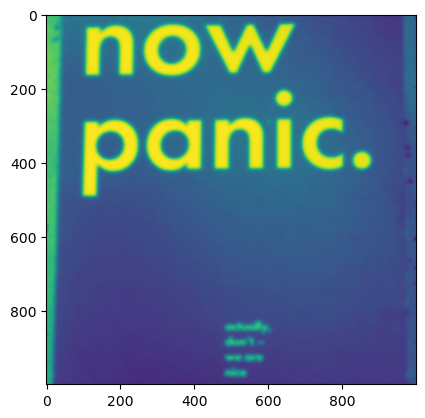

In [14]:
plt.imshow(_)